In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the filtered DataFrame from the CSV file
filtered_df = pd.read_csv('data/filtered_data_2.csv')

# Display the first few rows of the DataFrame to verify it loaded correctly
print(filtered_df.head())

         date                    Company Name      Symbol  \
0  2015-11-16  speciality restaurants limited  SPECIALITY   
1  2015-08-13  speciality restaurants limited  SPECIALITY   
2  2024-09-14           eicher motors limited   EICHERMOT   
3  2024-08-09           eicher motors limited   EICHERMOT   
4  2024-08-09           eicher motors limited   EICHERMOT   

                         author         Sector  expected_return  actual_return  
0                         Karvy     Technology         9.432421      -0.018033  
1           Reliance Securities     Technology         7.189542       0.018065  
2  Consensus Share Price Target  Manufacturing              NaN            NaN  
3                   Axis Direct  Manufacturing         4.748892            NaN  
4           Prabhudas Lilladhar  Manufacturing        10.441767            NaN  


In [9]:
# Calculate correlation
correlation = filtered_df[['expected_return', 'actual_return']].corr().iloc[0, 1]
print(f"Correlation between expected returns and actual returns: {correlation}")

Correlation between expected returns and actual returns: -0.014011949185752538


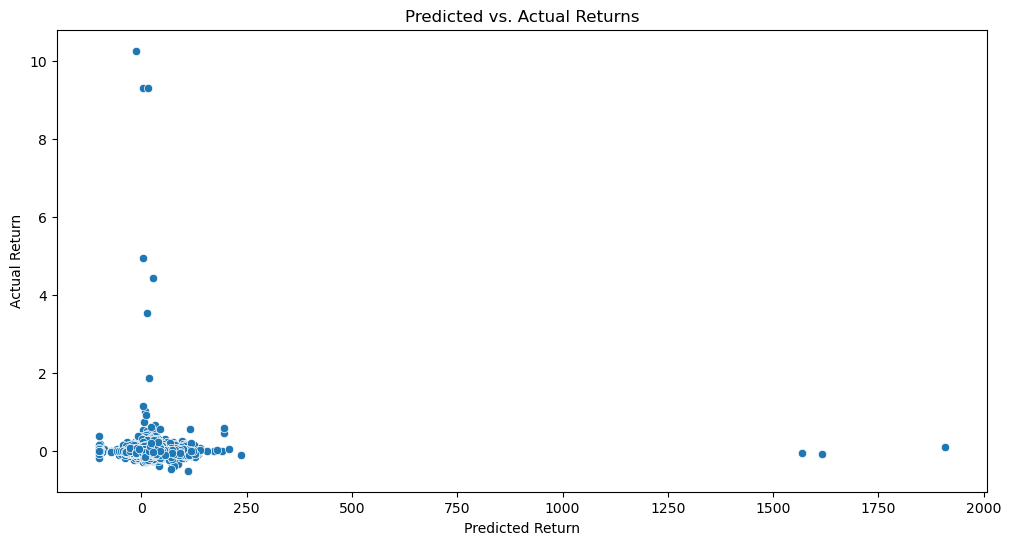

In [10]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_df, x='expected_return', y='actual_return')
plt.title('Predicted vs. Actual Returns')
plt.xlabel('Predicted Return')
plt.ylabel('Actual Return')
plt.show()


In [11]:
# Groupby Timelines
import pandas as pd

# Step 1: Extract the year from the 'date' column
filtered_df['year'] = pd.to_datetime(filtered_df['date']).dt.year

# Step 2: Calculate the correlation between actual and expected return grouped by year
# Ensure you have an 'actual_return' column calculated in your DataFrame
correlation_by_year = filtered_df.groupby('year').apply(
    lambda group: group[['expected_return', 'actual_return']].corr().iloc[0, 1]
)

# Print the correlation results for each year
print("Correlation between expected and actual returns by year:")
print(correlation_by_year)

Correlation between expected and actual returns by year:
year
2009         NaN
2010   -1.000000
2011   -0.019062
2012    0.079827
2013    0.179031
2014    0.024048
2015   -0.063661
2016    0.036793
2017    0.065269
2018    0.003071
2019   -0.032435
2020   -0.025079
2021   -0.011135
2022   -0.037633
2023    0.017206
2024    0.038387
dtype: float64


C:\Users\disch\AppData\Local\Temp\ipykernel_7960\3742466470.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_year = filtered_df.groupby('year').apply(


In [12]:
correlation_by_year.sort_values(ascending=False).head(10)

year
2013    0.179031
2012    0.079827
2017    0.065269
2024    0.038387
2016    0.036793
2014    0.024048
2023    0.017206
2018    0.003071
2021   -0.011135
2011   -0.019062
dtype: float64

In [13]:
# Step 1: Extract the year from the 'date' column
filtered_df['year'] = pd.to_datetime(filtered_df['date']).dt.year

# Step 2: Calculate the correlation between actual and expected returns grouped by year and ticker
def calculate_correlation(group):
    return group[['expected_return', 'actual_return']].corr().iloc[0, 1]

# Group by 'year' and 'Symbol' (ticker) and calculate correlation
correlation_by_year_and_ticker = filtered_df.groupby(['year', 'Symbol']).apply(calculate_correlation).reset_index(name='correlation')

# Step 3: Map the expected and actual returns for each ticker in each year
mapped_returns = filtered_df.groupby(['year', 'Symbol'])[['expected_return', 'actual_return']].mean().reset_index()

# Merge the correlation and return mappings
merged_results = pd.merge(correlation_by_year_and_ticker, mapped_returns, on=['year', 'Symbol'])

# Print the results
print("Correlation, expected and actual returns by year and ticker:")
print(merged_results)


Correlation, expected and actual returns by year and ticker:
      year     Symbol  correlation  expected_return  actual_return
0     2009        IRB          NaN        -1.626179       0.019124
1     2009  LICHSGFIN          NaN              NaN       0.009512
2     2009        PFC          NaN              NaN       0.049052
3     2010   AXISBANK          NaN              NaN      -0.010174
4     2010   JSWSTEEL    -1.000000        11.714472      -0.013579
...    ...        ...          ...              ...            ...
5310  2024     ZENTEC          NaN        13.110220       0.005954
5311  2024  ZFCVINDIA    -0.819076         6.522456      -0.002360
5312  2024     ZOMATO     0.100556        22.666368       0.001693
5313  2024  ZYDUSLIFE     0.001610         8.579820       0.015243
5314  2024  ZYDUSWELL          NaN        14.964334       0.016309

[5315 rows x 5 columns]


C:\Users\disch\AppData\Local\Temp\ipykernel_7960\2612998841.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_year_and_ticker = filtered_df.groupby(['year', 'Symbol']).apply(calculate_correlation).reset_index(name='correlation')


C:\Users\disch\AppData\Local\Temp\ipykernel_7960\3784741381.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_year_and_ticker = filtered_df.groupby(['year', 'Symbol']).apply(calculate_correlation).reset_index(name='correlation')


<Figure size 1400x800 with 0 Axes>

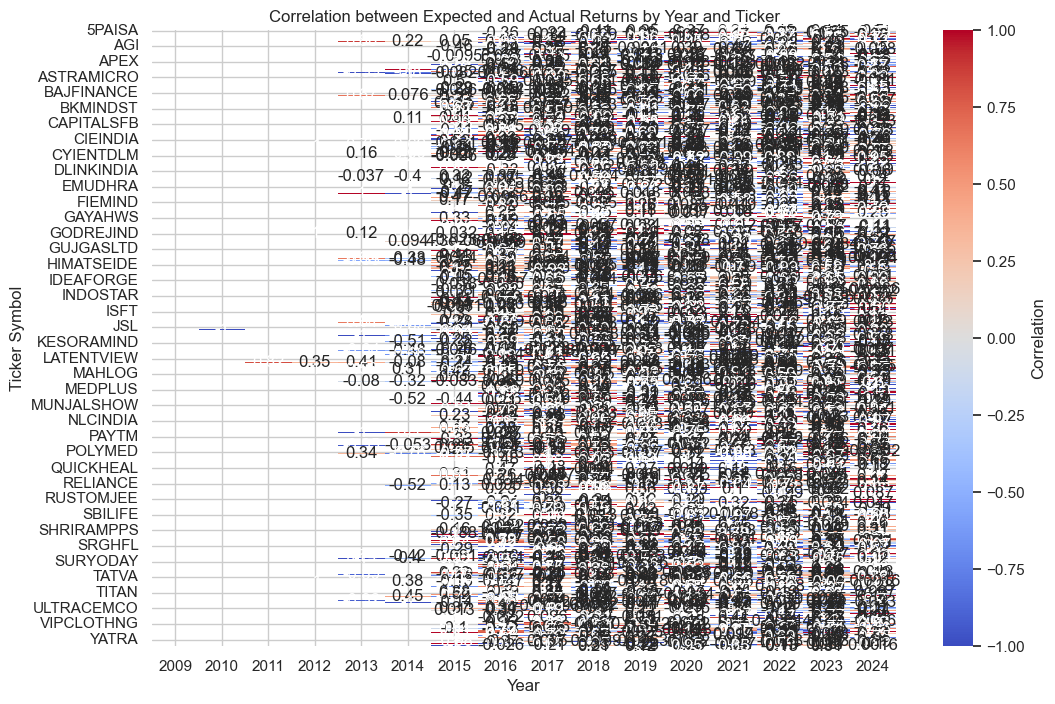

In [14]:
# Step 1: Extract year from 'date' column
filtered_df['year'] = pd.to_datetime(filtered_df['date']).dt.year

# Step 2: Calculate correlation grouped by year and ticker
def calculate_correlation(group):
    return group[['expected_return', 'actual_return']].corr().iloc[0, 1]

correlation_by_year_and_ticker = filtered_df.groupby(['year', 'Symbol']).apply(calculate_correlation).reset_index(name='correlation')

# Step 3: Map the expected and actual returns
mapped_returns = filtered_df.groupby(['year', 'Symbol'])[['expected_return', 'actual_return']].mean().reset_index()

# Merge correlation results with mapped returns
merged_results = pd.merge(correlation_by_year_and_ticker, mapped_returns, on=['year', 'Symbol'])

# Step 4: Plotting
# Set up the plot environment
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# # Plot 1: Line plot of expected and actual returns for each year and ticker
# for ticker in merged_results['Symbol'].unique():
#     ticker_data = merged_results[merged_results['Symbol'] == ticker]
    
#     plt.plot(ticker_data['year'], ticker_data['expected_return'], label=f'{ticker} Expected Return', linestyle='--')
#     plt.plot(ticker_data['year'], ticker_data['actual_return'], label=f'{ticker} Actual Return', linestyle='-')

# # Plot title and labels
# plt.title("Expected vs Actual Returns by Year and Ticker")
# plt.xlabel("Year")
# plt.ylabel("Return (%)")
# plt.legend(loc="upper right")
# plt.grid(True)
# # Save the plot to the device
# plt.savefig('data/expected_vs_actual_returns_line_plot.png')
# plt.show()

# # Plot 2: Scatter plot of expected vs actual returns with correlation
# plt.figure(figsize=(10, 6))
# for ticker in merged_results['Symbol'].unique():
#     ticker_data = merged_results[merged_results['Symbol'] == ticker]
#     sns.scatterplot(data=ticker_data, x='expected_return', y='actual_return', label=ticker, s=100)

# # Scatter plot title and labels
# plt.title("Expected vs Actual Returns by Ticker")
# plt.xlabel("Expected Return (%)")
# plt.ylabel("Actual Return (%)")
# plt.legend(loc="best")
# plt.grid(True)
# # Save the scatter plot
# plt.savefig('data/expected_vs_actual_returns_scatter_plot.png')
# plt.show()


# Plot 3: Heatmap of correlations by year and ticker
pivot_table = merged_results.pivot(index="Symbol", columns="year", values="correlation")
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", center=0, cbar_kws={'label': 'Correlation'})
plt.title("Correlation between Expected and Actual Returns by Year and Ticker")
plt.xlabel("Year")
plt.ylabel("Ticker Symbol")
# Save the heatmap plot
plt.savefig('data/correlation_heatmap.png')
plt.show()

In [15]:
# Step 1: Calculate correlation grouped by sector
def calculate_correlation(group):
    return group[['expected_return', 'actual_return']].corr().iloc[0, 1]

# Group by sector and calculate the correlation for each sector
correlation_by_sector = filtered_df.groupby('Sector').apply(calculate_correlation).reset_index(name='correlation')

# Display the correlation by sector
print("Correlation between expected and actual returns by sector:")
print(correlation_by_sector)

Correlation between expected and actual returns by sector:
                   Sector  correlation
0             Agriculture     0.053406
1          Consumer Goods    -0.060622
2                  Energy     0.043599
3                 Finance    -0.057443
4              Healthcare    -0.015131
5           Manufacturing    -0.015510
6   Media & Entertainment          NaN
7             Real Estate     0.219665
8                  Retail     0.268740
9              Technology     0.010542
10     Telecommunications    -0.129929
11         Transportation     0.076706
12                Unknown     0.002256
13              Utilities     0.013959


C:\Users\disch\AppData\Local\Temp\ipykernel_7960\2895770494.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_sector = filtered_df.groupby('Sector').apply(calculate_correlation).reset_index(name='correlation')


In [16]:
correlation_by_sector.sort_values(by='correlation', ascending=False).head(10)

,Sector,correlation
8,Retail,0.268740
7,Real Estate,0.219665
11,Transportation,0.076706
0,Agriculture,0.053406
2,Energy,0.043599
13,Utilities,0.013959
9,Technology,0.010542
12,Unknown,0.002256
4,Healthcare,-0.015131
5,Manufacturing,-0.015510


In [17]:
import pandas as pd

# Filter out rows with NaN values in 'expected_return' and 'actual_return'
filtered_author_df = filtered_df.dropna(subset=['expected_return', 'actual_return'])

# Calculate correlations by author, excluding groups with insufficient data
author_correlations = (
    filtered_author_df.groupby('author', as_index=False)  # Keep author as a column
    .filter(lambda x: len(x) > 1)  # Ensure at least two data points
)

# Now calculate the correlation
author_correlations = (
    author_correlations.groupby('author', group_keys=False)
    .apply(lambda x: pd.Series({'correlation': x['expected_return'].corr(x['actual_return'])}))
    .reset_index()
)

# Display the results
print(author_correlations)

                                    author  correlation
0                              AUM Capital    -0.200702
1                             Ajcon Global     0.255312
2                              Anand Rathi    -0.286544
3                            Angel Broking    -0.073314
4                          Arihant Capital    -0.118222
5                          Ashika Research    -0.053815
6    Asit C Mehta Investment Intermediates     0.485725
7   Asit C Mehta Investment Interrmediates     0.071758
8                              Axis Direct     0.015929
9                 BOB Capital Markets Ltd.    -0.059424
10                               BP Wealth    -0.205389
11                                 Bonanza     0.093265
12                           CD Equisearch    -0.025384
13                         Centrum Broking    -0.100980
14                            Choice India     0.230158
15                     Chola Wealth Direct     0.038047
16                           Dolat Capital    -0

C:\Users\disch\AppData\Local\Temp\ipykernel_7960\1515320299.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: pd.Series({'correlation': x['expected_return'].corr(x['actual_return'])}))


In [18]:
author_correlations.sort_values(by='correlation', ascending=False).head(10)

,author,correlation
30,Investment Imperative,1.000000
6,Asit C Mehta Investment Intermediates,0.485725
21,FundsIndia,0.410235
1,Ajcon Global,0.255312
14,Choice India,0.230158
37,Keynotes Financial Opiniery,0.204828
32,Joindre Capital Services,0.180041
11,Bonanza,0.093265
17,Dynamic Levels,0.079982
7,Asit C Mehta Investment Interrmediates,0.071758


In [19]:
import pandas as pd

# Using .loc to avoid SettingWithCopyWarning
filtered_df.loc[:, 'expected_return'] = pd.to_numeric(filtered_df['expected_return'], errors='coerce')
filtered_df.loc[:, 'actual_return'] = pd.to_numeric(filtered_df['actual_return'], errors='coerce')

# Drop rows where either 'expected_return' or 'actual_return' is NaN
filtered_df = filtered_df.dropna(subset=['expected_return', 'actual_return'])

# Function to calculate correlation with minimum group size check
def calculate_correlation(df, group_cols):
    # Filter groups with at least two data points to avoid degrees of freedom error
    df_grouped = df.groupby(group_cols).filter(lambda x: len(x) > 1)
    return df_grouped.groupby(group_cols, as_index=False).apply(
        lambda x: pd.Series({'correlation': x['expected_return'].corr(x['actual_return'])})
    ).reset_index(drop=True)

# (1) Correlation by (year, author)
year_author_corr = calculate_correlation(filtered_df, ['year', 'author'])

# Display the results
print("Correlation by (year, author):\n", year_author_corr)

Correlation by (year, author):
      year               author  correlation
0    2010  Chola Wealth Direct    -1.000000
1    2011  Chola Wealth Direct    -0.019062
2    2012      Ashika Research     0.809749
3    2012  Chola Wealth Direct     0.269738
4    2013         Ajcon Global     1.000000
..    ...                  ...          ...
298  2024  Prabhudas Lilladhar    -0.010773
299  2024       SBI Securities     0.400354
300  2024            Sharekhan    -0.043946
301  2024   Trendlyne Analysis     1.000000
302  2024              Ventura     0.049858

[303 rows x 3 columns]


C:\Users\disch\AppData\Local\Temp\ipykernel_7960\2909189485.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df_grouped.groupby(group_cols, as_index=False).apply(


In [20]:
year_author_corr.sort_values(by='correlation', ascending=False).head(10)

,year,author,correlation
159,2020,AUM Capital,1.000000
147,2019,Khambatta Securities,1.000000
4,2013,Ajcon Global,1.000000
20,2015,GEPL Capital,1.000000
301,2024,Trendlyne Analysis,1.000000
129,2019,Ashika Research,1.000000
155,2019,SPA Research,1.000000
285,2024,East India Securities Ltd,1.000000
238,2022,Kotak Securities,1.000000
264,2023,KamayaKya Wealth,0.879026


In [21]:
import pandas as pd

# Assuming filtered_df already has 'year', 'expected_return', and 'actual_return' columns

# Step 1: Define a function to calculate correlation for each group
def calculate_correlation(group):
    return group[['expected_return', 'actual_return']].corr().iloc[0, 1]

# Step 2: Group by year and author, then calculate correlation
correlation_by_author_year = (
    filtered_df.groupby(['year', 'author'])
    .apply(calculate_correlation)
    .reset_index(name='correlation')
)

# Step 3: Remove rows with NaN correlations
correlation_by_author_year.dropna(subset=['correlation'], inplace=True)

# Step 4: Sort values within each year to get the top 10 authors by correlation
top_authors_by_year = (
    correlation_by_author_year
    .sort_values(by=['year', 'correlation'], ascending=[True, False])
    .groupby('year')
    .head(10)
)

# Display the result
print("Top 10 Authors by Year based on Correlation between Expected and Actual Returns (No NaN values):")
print(top_authors_by_year)
# Save the result to a CSV file
top_authors_by_year.to_csv('data/top_authors_by_year.csv', index=False)

print("Top 10 authors by year saved to 'top_authors_by_year.csv'")


Top 10 Authors by Year based on Correlation between Expected and Actual Returns (No NaN values):
     year                    author  correlation
1    2010       Chola Wealth Direct    -1.000000
2    2011       Chola Wealth Direct    -0.019062
3    2012           Ashika Research     0.809749
4    2012       Chola Wealth Direct     0.269738
6    2013              Ajcon Global     1.000000
..    ...                       ...          ...
296  2024           Ashika Research     0.221485
315  2024      Keynote Capitals Ltd     0.190602
310  2024              ICICI Direct     0.174626
305  2024                 Edelweiss     0.160060
300  2024  BOB Capital Markets Ltd.     0.103829

[114 rows x 3 columns]
Top 10 authors by year saved to 'top_authors_by_year.csv'


C:\Users\disch\AppData\Local\Temp\ipykernel_7960\3212683815.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(calculate_correlation)


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and 

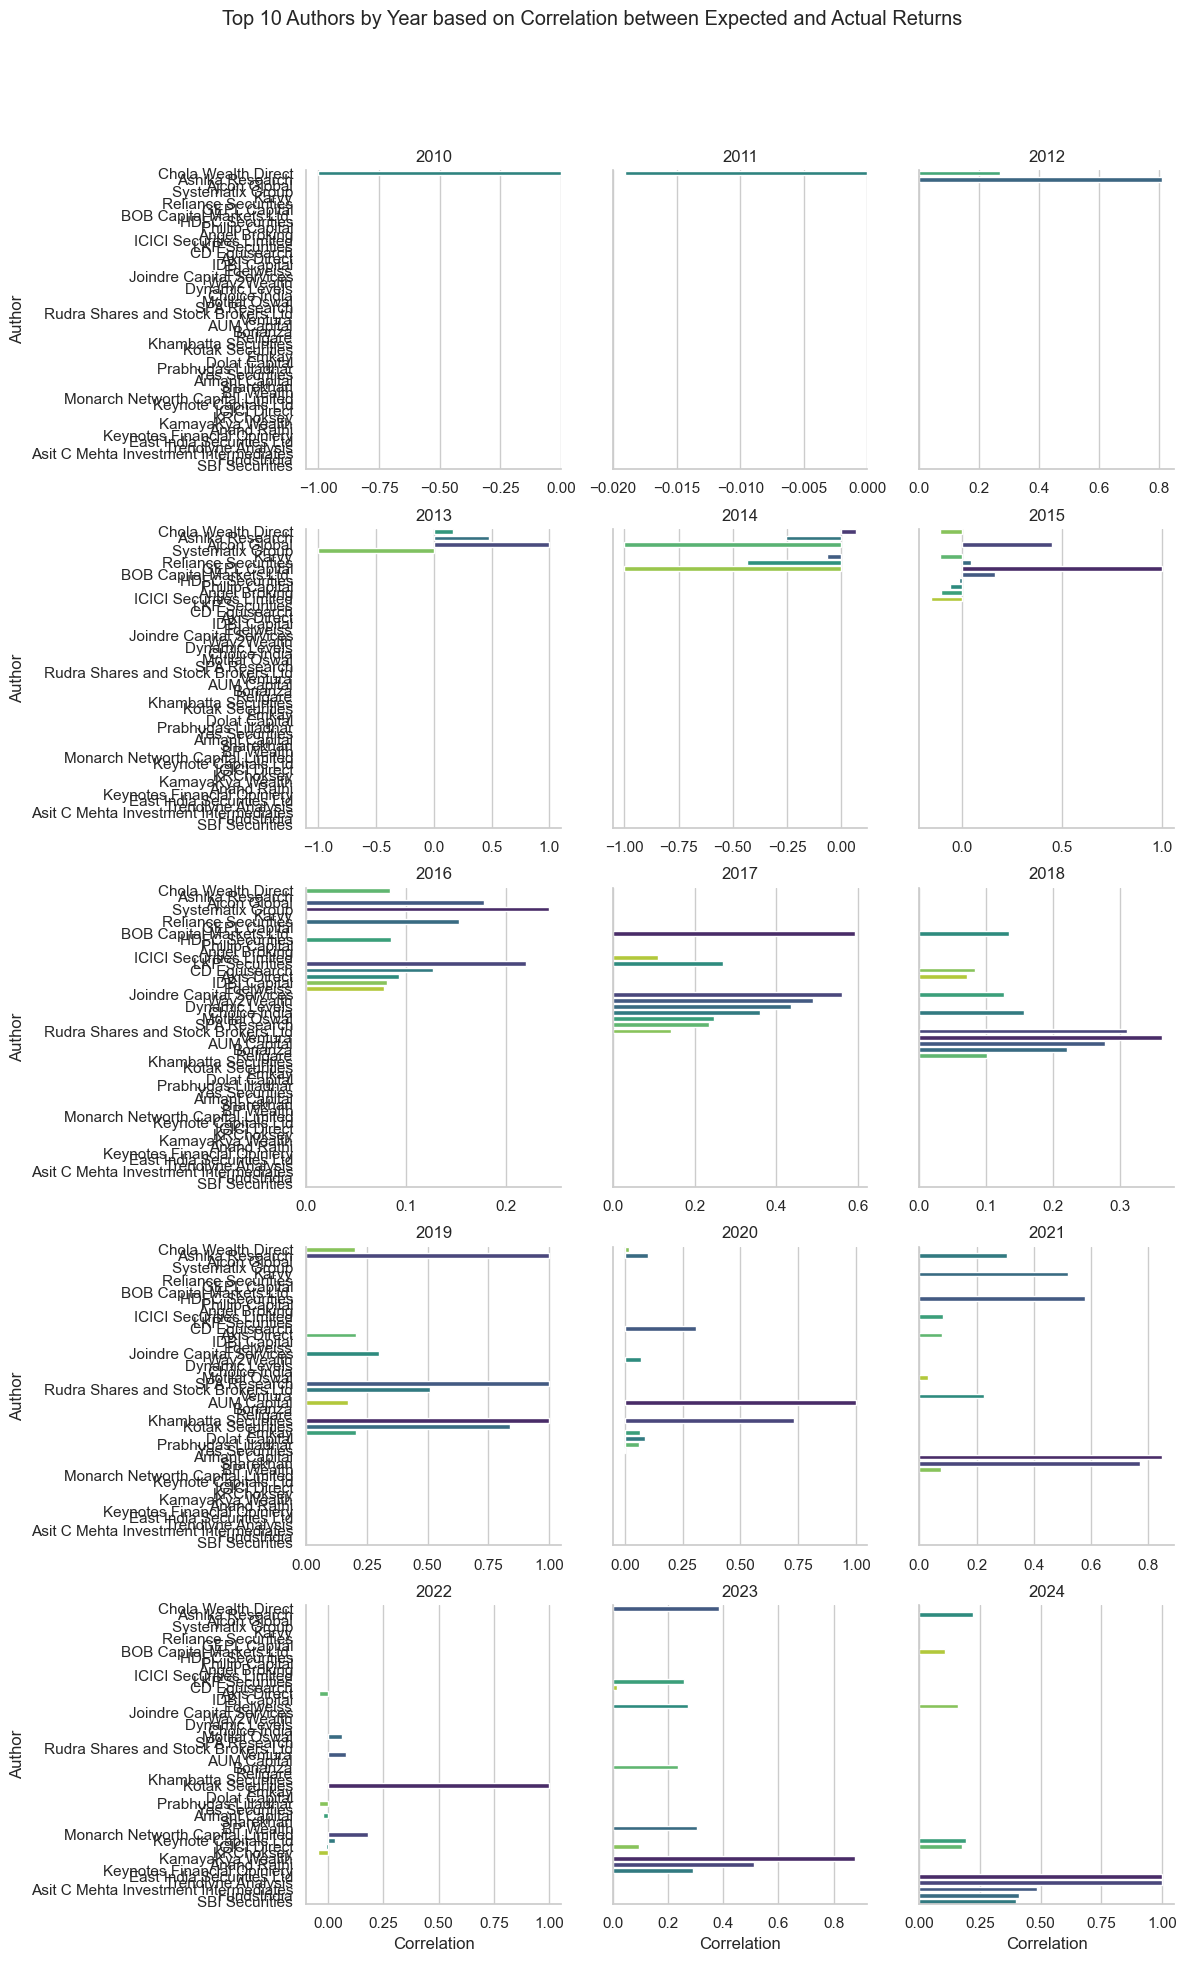

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style
sns.set(style="whitegrid")

# Initialize a FacetGrid for each year to display the top 10 authors and their correlations
g = sns.FacetGrid(top_authors_by_year, col='year', col_wrap=3, height=4, sharex=False, sharey=True)
g.map_dataframe(sns.barplot, x='correlation', y='author', palette="viridis", orient='h')

# Set the titles and layout
g.set_titles("{col_name}")
g.set_axis_labels("Correlation", "Author")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Top 10 Authors by Year based on Correlation between Expected and Actual Returns")

# Display the plot
plt.show()

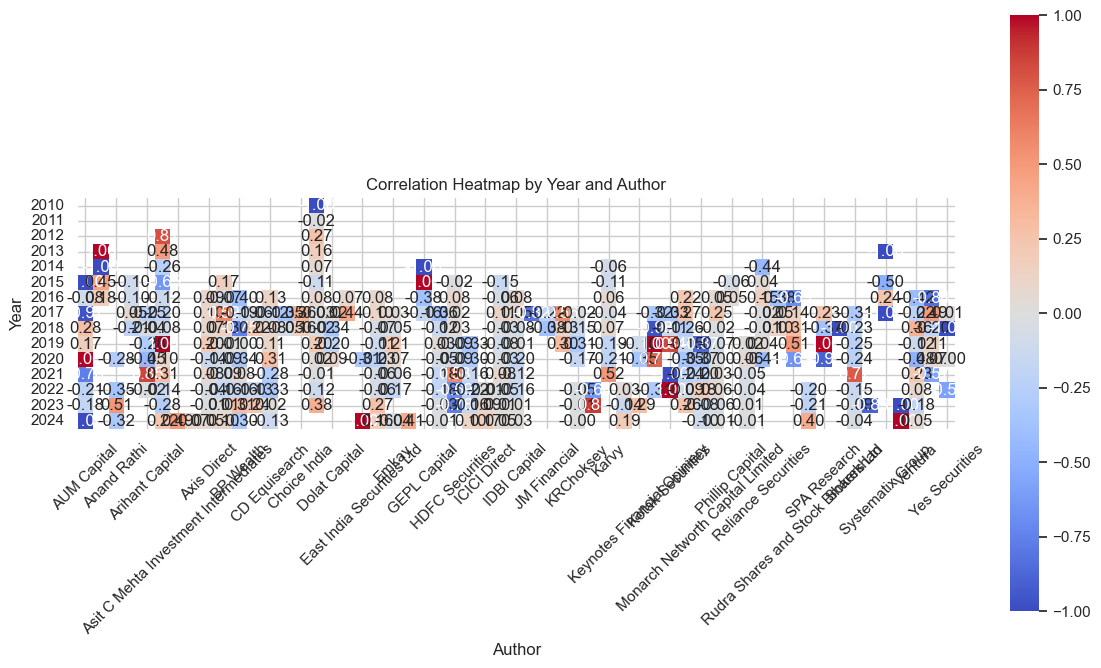

In [23]:
# Pivot the DataFrame to get a matrix for the heatmap
heatmap_data = year_author_corr.pivot(index='year', columns='author', values='correlation')

# Display the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap by Year and Author')
plt.xlabel('Author')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [25]:
import pandas as pd

# Step 1: Calculate correlation grouped by year and sector
def calculate_correlation(group):
    return group[['expected_return', 'actual_return']].corr().iloc[0, 1]

# Group by year and sector, calculate correlation
correlation_by_sector_year = (
    filtered_df.groupby(['year', 'Sector'])
    .apply(calculate_correlation)
    .reset_index(name='correlation')
)

# Step 2: Remove rows with NaN correlations
correlation_by_sector_year.dropna(subset=['correlation'], inplace=True)

# Step 3: Sort within each year to get the top 10 sectors by correlation
top_sectors_by_year = (
    correlation_by_sector_year
    .sort_values(by=['year', 'correlation'], ascending=[True, False])
    .groupby('year')
    .head(10)
)

# Display the result
print("Top 10 Sectors by Year based on Correlation between Expected and Actual Returns (No NaN values):")
print(top_sectors_by_year)

# Save to CSV if needed
top_sectors_by_year.to_csv("data/top_10_sectors_by_year.csv", index=False)


Top 10 Sectors by Year based on Correlation between Expected and Actual Returns (No NaN values):
     year              Sector  correlation
1    2010       Manufacturing    -1.000000
3    2011             Finance     0.220023
10   2012          Technology     1.000000
8    2012          Healthcare     1.000000
5    2012      Consumer Goods     1.000000
..    ...                 ...          ...
144  2024      Consumer Goods     0.127743
148  2024       Manufacturing     0.051779
154  2024             Unknown     0.050567
152  2024  Telecommunications     0.045110
147  2024          Healthcare     0.019818

[124 rows x 3 columns]


C:\Users\disch\AppData\Local\Temp\ipykernel_7960\3583796455.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(calculate_correlation)


In [26]:
# (2) Correlation by (year, sector)
year_sector_corr = calculate_correlation(filtered_df, ['year', 'Sector'])
print("\nCorrelation by (year, sector):\n", year_sector_corr)

TypeError: calculate_correlation() takes 1 positional argument but 2 were given

In [27]:
year_sector_corr.sort_values(by='correlation', ascending=False).head(10)

NameError: name 'year_sector_corr' is not defined

In [28]:
# Pivot the DataFrame to get a matrix for the heatmap
heatmap_data_sector = year_sector_corr.pivot(index='year', columns='Sector', values='correlation')

# Display the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_sector, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap by Year and Sector')
plt.xlabel('Sector')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

NameError: name 'year_sector_corr' is not defined

In [29]:
filtered_df['Sector'].unique()

array(['Technology', 'Manufacturing', 'Telecommunications', 'Energy',
       'Unknown', 'Finance', 'Healthcare', 'Consumer Goods',
       'Transportation', 'Utilities', 'Agriculture', 'Retail',
       'Real Estate', 'Media & Entertainment'], dtype=object)

In [30]:
filtered_df['author'].unique()

array(['Karvy', 'Reliance Securities', 'BOB Capital Markets Ltd.',
       'ICICI Direct', 'Axis Direct', 'Emkay', 'Prabhudas Lilladhar',
       'Geojit BNP Paribas', 'ICICI Securities Limited', 'Motilal Oswal',
       'Ventura', 'HDFC Securities', 'IDBI Capital', 'Dolat Capital',
       'JM Financial', 'Religare', 'Angel Broking',
       'Keynote Capitals Ltd', 'Sharekhan', 'LKP Securities',
       'Ashika Research', 'Edelweiss', 'Anand Rathi', 'Hem Securities',
       'Centrum Broking', 'Kotak Securities', 'Phillip Capital',
       'AUM Capital', 'Joindre Capital Services', 'KRChoksey',
       'Rudra Shares and Stock Brokers Ltd', 'Chola Wealth Direct',
       'Choice India', 'Dynamic Levels', 'KamayaKya Wealth',
       'SBI Securities', 'Arihant Capital', 'BP Wealth',
       'Keynotes Financial Opiniery', 'Yes Securities',
       'Monarch Networth Capital Limited', 'Bonanza', 'Way2Wealth',
       'Asit C Mehta Investment Interrmediates', 'SPA Research',
       'CD Equisearch', 'Syste

In [31]:
# Sort filtered_df by Company Name, then by author, and then by date
sorted_filtered_df = filtered_df.sort_values(by=['Company Name', 'author', 'date']).reset_index(drop=True)

sorted_filtered_df.to_csv('sorted_filtered_df.csv', index=False)

In [32]:
# (3) Correlation by (sector, author)
sector_author_corr = calculate_correlation(filtered_df, ['Sector', 'author'])
print("\nCorrelation by (sector, author):\n", sector_author_corr)

TypeError: calculate_correlation() takes 1 positional argument but 2 were given

In [33]:
sector_author_corr.sort_values(by='correlation', ascending=False).head(10)

NameError: name 'sector_author_corr' is not defined

In [34]:
import pandas as pd

# Step 1: Calculate correlation grouped by sector and author
def calculate_correlation(group):
    return group[['expected_return', 'actual_return']].corr().iloc[0, 1]

# Group by sector and author, calculate correlation
correlation_by_author_sector = (
    filtered_df.groupby(['Sector', 'author'])
    .apply(calculate_correlation)
    .reset_index(name='correlation')
)

# Step 2: Remove rows with NaN correlations
correlation_by_author_sector.dropna(subset=['correlation'], inplace=True)

# Step 3: Sort within each sector to get the top 10 authors by correlation
top_authors_by_sector = (
    correlation_by_author_sector
    .sort_values(by=['Sector', 'correlation'], ascending=[True, False])
    .groupby('Sector')
    .head(10)
)

# Display the result
print("Top 10 Authors for Each Sector based on Correlation between Expected and Actual Returns (No NaN values):")
print(top_authors_by_sector)

# Save to CSV if needed
top_authors_by_sector.to_csv("top_10_authors_by_sector.csv", index=False)


Top 10 Authors for Each Sector based on Correlation between Expected and Actual Returns (No NaN values):
          Sector                    author  correlation
8    Agriculture                     Karvy     0.685294
2    Agriculture             Dolat Capital     0.500274
9    Agriculture             Motilal Oswal     0.191105
0    Agriculture               Axis Direct     0.027961
1    Agriculture       Chola Wealth Direct     0.007636
..           ...                       ...          ...
457    Utilities  BOB Capital Markets Ltd.     0.341041
469    Utilities              ICICI Direct     0.255471
467    Utilities           HDFC Securities     0.214909
478    Utilities       Reliance Securities     0.199019
477    Utilities       Prabhudas Lilladhar     0.175053

[124 rows x 3 columns]


C:\Users\disch\AppData\Local\Temp\ipykernel_7960\1606397601.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(calculate_correlation)


In [35]:
import pandas as pd

# Custom function to calculate correlation by 'company' and 'author'
def calculate_company_author_correlation(df):
    correlation_results = []

    # Group the DataFrame by 'company' and 'author'
    grouped_df = df.groupby(['Company Name', 'author'])

    # Calculate correlation within each group
    for (company, author), group_data in grouped_df:
        # Only compute correlation if there are at least two data points
        if group_data['expected_return'].count() > 1:
            # Calculate Pearson correlation between 'expected_return' and 'actual_return'
            corr = group_data['expected_return'].corr(group_data['actual_return'])
            if corr is not None:  # Exclude None results
                correlation_results.append({
                    'Company Name': company,
                    'author': author,
                    'correlation': corr
                })

    # Convert results to DataFrame
    correlation_df = pd.DataFrame(correlation_results)
    return correlation_df

# Example usage:
company_author_corr = calculate_company_author_correlation(filtered_df)
print("\nCorrelation by (Company Name, author):\n", company_author_corr)

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]



Correlation by (Company Name, author):
                        Company Name                    author  correlation
0     a2z infra engineering limited               Axis Direct     0.067657
1     a2z infra engineering limited  BOB Capital Markets Ltd.    -0.750812
2     a2z infra engineering limited             Dolat Capital     0.998534
3     a2z infra engineering limited                     Emkay    -1.000000
4     a2z infra engineering limited        Geojit BNP Paribas     0.725962
...                             ...                       ...          ...
3857         zydus wellness limited  BOB Capital Markets Ltd.    -0.314928
3858         zydus wellness limited                 Edelweiss     0.448092
3859         zydus wellness limited              ICICI Direct     0.593379
3860         zydus wellness limited  ICICI Securities Limited     0.022573
3861         zydus wellness limited                 Sharekhan     0.102055

[3862 rows x 3 columns]


In [36]:
company_author_corr.sort_values(by='correlation', ascending=False).head(10)

,Company Name,author,correlation
2819,radico khaitan limited,Dolat Capital,1.0
683,ceat limited,BP Wealth,1.0
652,capacit'e infraprojects limited,Ventura,1.0
2142,larsen & toubro limited,Yes Securities,1.0
1374,gujarat gas limited,Ventura,1.0
3025,shankara building products limited,Kotak Securities,1.0
2124,landmark cars limited,Monarch Networth Capital Limited,1.0
993,divi's laboratories limited,KRChoksey,1.0
988,divi's laboratories limited,Emkay,1.0
1381,gujarat state fertilizers & chemicals limited,Emkay,1.0


In [37]:
# Pivot the DataFrame to get a matrix for the heatmap
heatmap_data_author = sector_author_corr.pivot(index='Sector', columns='author', values='correlation')

# Display the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data_author, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap by Sector and Author')
plt.xlabel('Author')
plt.ylabel('Sector')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

NameError: name 'sector_author_corr' is not defined

In [38]:
# 31/10

# Using .loc to avoid SettingWithCopyWarning
filtered_df.loc[:, 'expected_return'] = pd.to_numeric(filtered_df['expected_return'], errors='coerce')
filtered_df.loc[:, 'actual_return'] = pd.to_numeric(filtered_df['actual_return'], errors='coerce')

# Drop rows where either 'expected_return' or 'actual_return' is NaN
filtered_df = filtered_df.dropna(subset=['expected_return', 'actual_return'])

# Function to calculate correlation with minimum group size check
def calculate_correlation(df, group_cols):
    # Filter groups with at least two data points to avoid degrees of freedom error
    df_grouped = df.groupby(group_cols).filter(lambda x: len(x) > 1)
    return df_grouped.groupby(group_cols, as_index=False).apply(
        lambda x: pd.Series({'correlation': x['expected_return'].corr(x['actual_return'])})
    ).reset_index(drop=True)

# (1) Correlation by (sector, author)
sector_author_corr = calculate_correlation(filtered_df, ['Sector', 'author'])
print("\nCorrelation by (sector, author):\n", sector_author_corr)

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]



Correlation by (sector, author):
           Sector               author  correlation
0    Agriculture          Axis Direct     0.027961
1    Agriculture  Chola Wealth Direct     0.007636
2    Agriculture        Dolat Capital     0.500274
3    Agriculture   Geojit BNP Paribas    -0.114649
4    Agriculture         ICICI Direct    -0.960741
..           ...                  ...          ...
414    Utilities      Phillip Capital     0.825124
415    Utilities  Prabhudas Lilladhar     0.175053
416    Utilities  Reliance Securities     0.199019
417    Utilities            Sharekhan    -0.134384
418    Utilities       Yes Securities     1.000000

[419 rows x 3 columns]


C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\disch\AppData\Local\Temp\ipykernel_7960\82131880.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df_grouped.groupby(group_cols, as_index=False).apply(


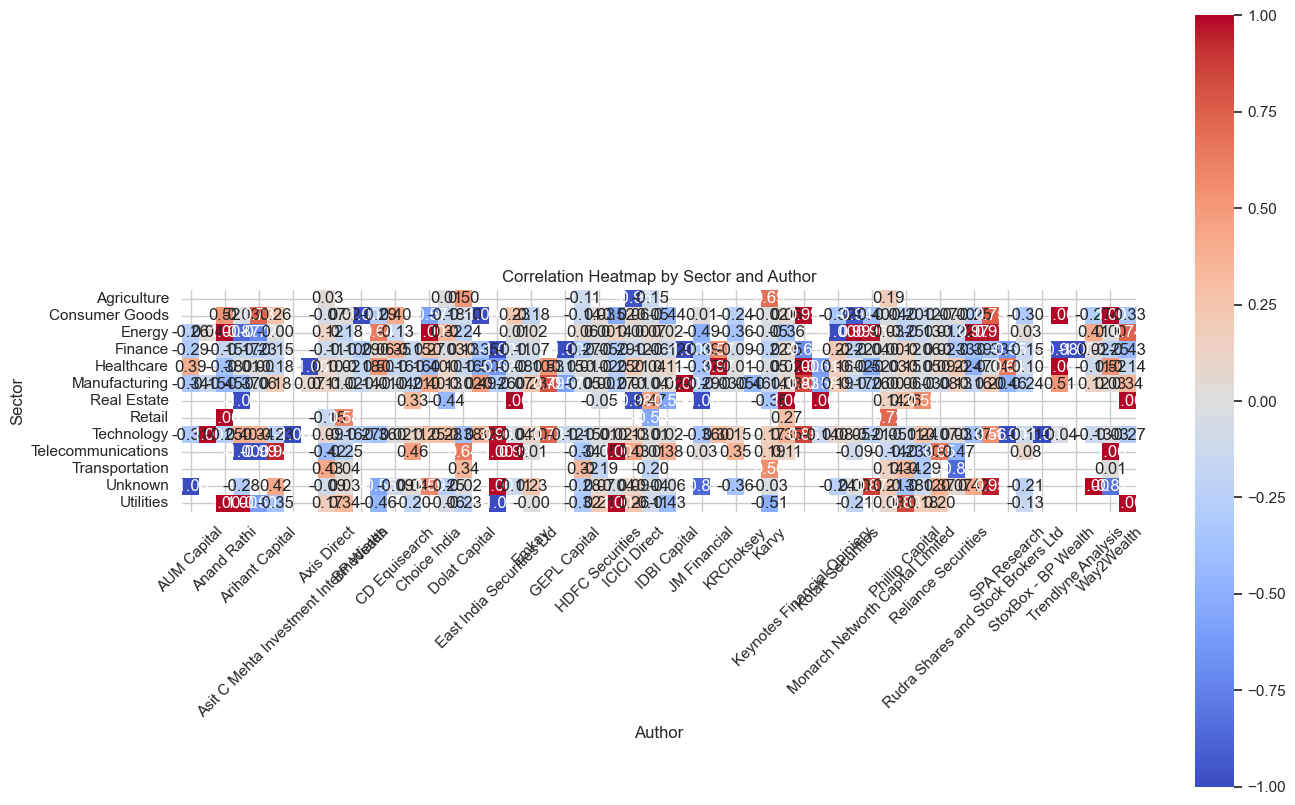

In [39]:

# Pivot the DataFrames for heatmap visualization
heatmap_data_author = sector_author_corr.pivot(index='Sector', columns='author', values='correlation')

# Plot heatmap for (sector, author)
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data_author, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap by Sector and Author')
plt.xlabel('Author')
plt.ylabel('Sector')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [40]:

# (2) Correlation by (sector, year)
sector_year_corr = calculate_correlation(filtered_df, ['Sector', 'year'])
print("\nCorrelation by (sector, year):\n", sector_year_corr)


Correlation by (sector, year):
           Sector  year  correlation
0    Agriculture  2013    -1.000000
1    Agriculture  2014     0.898267
2    Agriculture  2015     0.533495
3    Agriculture  2016    -0.376935
4    Agriculture  2017     0.453870
..           ...   ...          ...
144    Utilities  2020     0.055520
145    Utilities  2021    -0.307632
146    Utilities  2022    -0.144952
147    Utilities  2023    -0.047203
148    Utilities  2024     0.181741

[149 rows x 3 columns]


C:\Users\disch\AppData\Local\Temp\ipykernel_7960\82131880.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df_grouped.groupby(group_cols, as_index=False).apply(


In [41]:
sector_year_corr.sort_values(by='correlation', ascending=False).head(10)

,Sector,year,correlation
12,Consumer Goods,2012,1.000000
89,Retail,2020,1.000000
51,Healthcare,2012,1.000000
94,Technology,2012,1.000000
1,Agriculture,2014,0.898267
88,Real Estate,2024,0.743296
117,Transportation,2015,0.684181
65,Manufacturing,2012,0.675613
8,Agriculture,2021,0.643620
86,Real Estate,2022,0.563284


In [ ]:
heatmap_data_year = sector_year_corr.pivot(index='Sector', columns='year', values='correlation')
# Plot heatmap for (sector, year)
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data_year, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap by Sector and Year')
plt.xlabel('Year')
plt.ylabel('Sector')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
